In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as norm
import pickle
from tqdm import tqdm,tqdm_notebook
import os
import random
import time
import math
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import PIL
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import glob
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"


 101_ObjectCategories.tar.gz  '12th marksheet.pdf'     cat.jpg		  passbook.pdf
'10th marksheet (1).pdf'      'Aryan Aadhar (1).pdf'   cheque.pdf
'10th marksheet.pdf'	      'Aryan Aadhar.pdf'      'Colab Notebooks'
'12th marksheet (1).pdf'      'Aryan Pan Card.pdf'     Emergency4K.mp4


In [ ]:
!cp "/content/drive/MyDrive/101_ObjectCategories.tar.gz" "/content/"

In [ ]:
!tar -xvzf "/content/101_ObjectCategories.tar.gz" -C "/content/sample_data/"

Streaming output truncated to the last 5000 lines.
101_ObjectCategories/chair/image_0005.jpg
101_ObjectCategories/chair/image_0006.jpg
101_ObjectCategories/chair/image_0007.jpg
101_ObjectCategories/chair/image_0008.jpg
101_ObjectCategories/chair/image_0010.jpg
101_ObjectCategories/chair/image_0011.jpg
101_ObjectCategories/chair/image_0012.jpg
101_ObjectCategories/chair/image_0013.jpg
101_ObjectCategories/chair/image_0014.jpg
101_ObjectCategories/chair/image_0016.jpg
101_ObjectCategories/chair/image_0017.jpg
101_ObjectCategories/chair/image_0018.jpg
101_ObjectCategories/chair/image_0019.jpg
101_ObjectCategories/chair/image_0020.jpg
101_ObjectCategories/chair/image_0022.jpg
101_ObjectCategories/chair/image_0023.jpg
101_ObjectCategories/chair/image_0024.jpg
101_ObjectCategories/chair/image_0025.jpg
101_ObjectCategories/chair/image_0026.jpg
101_ObjectCategories/chair/image_0028.jpg
101_ObjectCategories/chair/image_0029.jpg
101_ObjectCategories/chair/image_0030.jpg
101_ObjectCategories/chai

In [ ]:
!rm -rf sample_data/101_ObjectCategories/BACKGROUND_Google

In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling = 'max')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:

from numpy.linalg import norm
def extract_features(img_path, model):
    input_shape = (224, 224, 3)  # Standard input shape for many models

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)  # Convert to array
    expanded_img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    preprocessed_img = preprocess_input(expanded_img_array)  # Normalize input

    # Extract features using the model
    features = model.predict(preprocessed_img)

    # Flatten the features
    flattened_features = features.flatten()

    # Normalize the feature vector
    norm_value = norm(flattened_features)
    if norm_value == 0:  # Avoid division by zero
        normalized_features = flattened_features
    else:
        normalized_features = flattened_features / norm_value

    return normalized_features


In [ ]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False

In [ ]:
IMG_PATH = 'cat.jpg'
if IS_COLAB_ENV:
  !curl https://drive.google.com/file/d/1EbuNPQQqdn29ILkNgK52_9lT5AkwVfvc/view?usp=sharing --output cat.jpg
  IMG_PATH = 'cat.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94982    0 94982    0     0   151k      0 --:--:-- --:--:-- --:--:--  151k


In [ ]:
from PIL import Image

IMG_PATH = "/content/drive/MyDrive/cat.jpg"  # Check the correct path
img = Image.open(IMG_PATH)
img.show()  # If this fails, the image is not valid

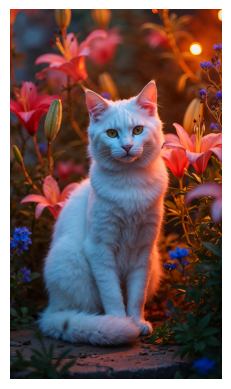

In [ ]:
import matplotlib.pyplot as plt

img = Image.open(IMG_PATH)
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()


In [ ]:
features = extract_features(IMG_PATH,model)
print("Total Number of features in One image",len(features))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Total Number of features in One image 2048


In [ ]:
extensions = ['.jpg','.JPG','.jpeg','.JPEG','.png','.PNG']

def get_file_list(root_dir):
  file_list = []
  for root,directories,filenames in os.walk(root_dir):
    for filename in filenames:
      if any(ext in filename for ext in extensions):
        filepath = os.path.join(root,filename)
        if os.path.exists(filepath):
          file_list.append(filepath)
        else:
          print(filepath)
  return file_list

In [ ]:
root_dir = '/content/sample_data/101_ObjectCategories'
filenames = sorted(get_file_list(root_dir))
print(len(filenames))


8677


In [ ]:
BATCH_SIZE = 128
generator = tf.keras.utils.image_dataset_from_directory(root_dir,shuffle = False,batch_size = BATCH_SIZE,image_size = (224,224))
num_images = len(generator.file_paths)
num_epochs = int(math.ceil(num_images / BATCH_SIZE))
start_time = time.time()
feature_list = []
feature_list = model.predict(generator,num_epochs)
end_time = time.time()
print("Time taken in feature extraction (in seconds): {:.2f}".format(end_time - start_time))

Found 8677 files belonging to 101 classes.
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 402ms/step
Time taken in feature extraction (in seconds): 40.96


In [ ]:
for i,features in enumerate (feature_list):
  feature_list[i] = features/norm(features)
feature_list = feature_list.reshape(len(feature_list),-1)

print("Num Images  =",len(generator.file_paths))
print("Shape of  feature_list = ",feature_list.shape)
print("Time taken in min = ",(end_time-start_time)/60)

Num Images  = 8677
Shape of  feature_list =  (8677, 2048)
Time taken in min =  0.682607130209605


In [ ]:
pickle.dump(generator.class_names, open('./sample_data/class_ids-caltech101.pickle', 'wb'))
pickle.dump(generator.file_paths, open('./sample_data/filenames-caltech101.pickle', 'wb'))
pickle.dump(
    feature_list,
    open('./sample_data/features-caltech101-' + 'resnet50' + '.pickle', 'wb'))


In [ ]:
filenames = pickle.load(open('./sample_data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./sample_data/features-caltech101-resnet50.pickle', 'rb'))
class_ids = pickle.load(open('./sample_data/class_ids-caltech101.pickle', 'rb'))

num_images = len(filenames)
num_features_per_image = len(feature_list[0])

print("Number of images = ", num_images)
print("Number of features per image = ", num_features_per_image)


Number of images =  8677
Number of features per image =  2048


In [ ]:
random_index = random.randint(0,num_images)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='cosine').fit(feature_list)
distances,indices = neighbors.kneighbors([feature_list[random_index]])

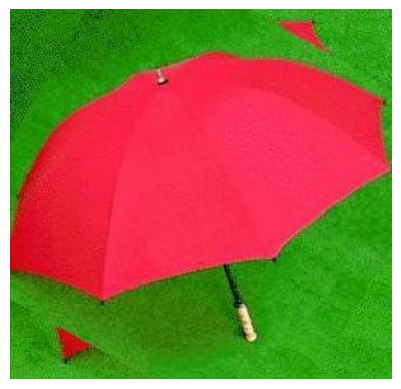

In [ ]:
plt.imshow(mpimg.imread(filenames[random_index]))
plt.axis('off')
plt.show()

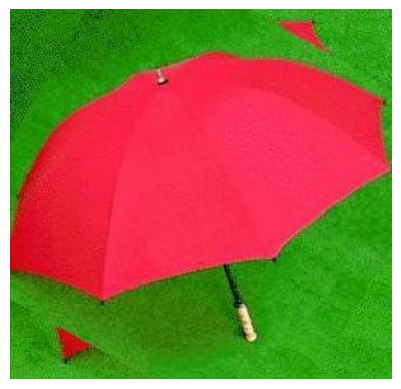

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))
plt.axis('off')
plt.show()

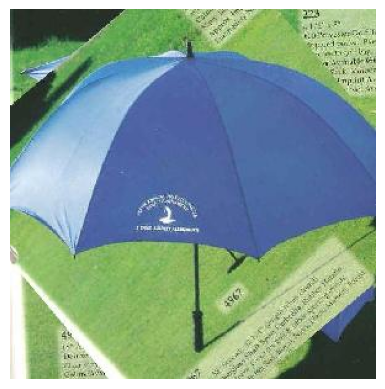

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]))
plt.axis('off')
plt.show()

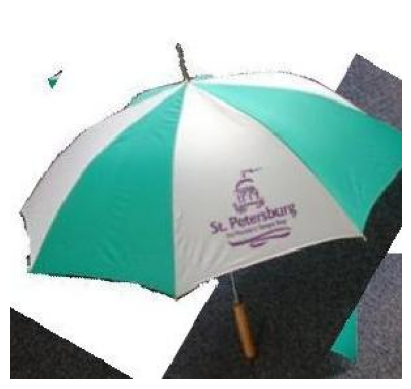

In [ ]:
plt.imshow(mpimg.imread(filenames[indices[0][2]]))
plt.axis('off')
plt.show()

In [ ]:
for i in range(5):
  print(distances[0][i])

0.0
0.25607455
0.2785023
0.2970649
0.3152467


In [ ]:
def classname(str):
  return str.split('/')[-2]

def classname_filename(str):
  return str.split('/')[-2]+'/'+str.split('/')[-1]

def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) // columns + 1, columns, i + 1)
        if i == 0:
          ax.set_title('Query Image\n'+classname_filename(filenames[i]))
        else:
          ax.set_title("Similar Image\n"+classname_filename(filenames[i])+ "\nDistance :"+str(float("{0.2f}".format(distances[i]))))
        plt.imshow(image)

AttributeError: 'numpy.float32' object has no attribute '2f'

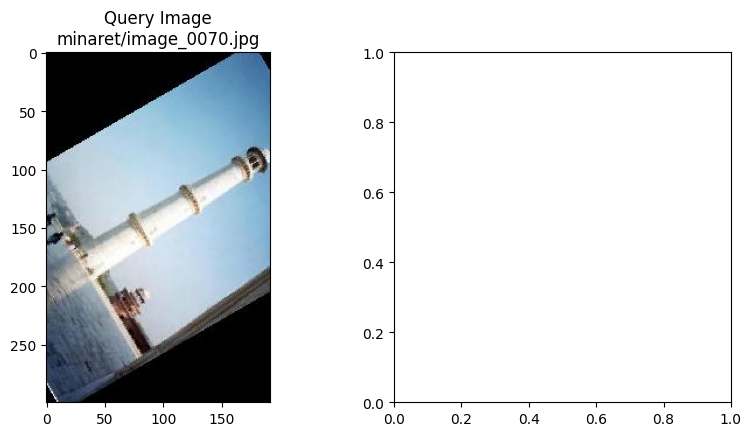

In [ ]:
for i in range(10):
  random_image_index = random.randint(0,8000)
  distances,indices = neighbors.kneighbors([feature_list[random_image_index]])

  similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1,4)]
  plot_images(similar_image_paths, distances[0])

In [ ]:
print('median distance between all photos: ',np.median(distances))
print('Max distance between all photos:',np.max(distances))
print('Median distance among Most similar Photos:',np.median(distances[:,2]))

median distance between all photos:  0.20053482
Max distance between all photos: 0.20730925
Median distance among Most similar Photos: 0.20033586


In [ ]:
def calculate_accuracy(feature_list):
  num_nearest_neigbors = 5
  correct_prediction = 0
  incorrect_prediction =0
  neighbors = NearestNeighbors(n_neighbors=num_nearest_neigbors,algorithm='brute',metric='cosine').fit(feature_list)
  start = time.time()
  for i in range(len(feature_list)):
    distances,indices = neighbors.kneighbors([feature_list[i]])
    for j in range(1,num_nearest_neigbors):
      if (classname(filenames[i]) == classname(filenames[indices[0][j]])):
        correct_prediction += 1
      else:
        incorrect_prediction += 1
  end = time.time()
  accuracy = round(
      100.0*correct_prediction/(1.0*correct_prediction+incorrect_prediction),2),end-start
  return accuracy

In [ ]:
num_features_dimensions = 150
pca = PCA(n_components=num_features_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)
print("Shape of feature_list_compressed = ",feature_list_compressed.shape)

Shape of feature_list_compressed =  (8677, 150)


In [ ]:
neighbors = NearestNeighbors(n_neighbors=5,algorithm='brute',metric = 'cosine').fit(feature_list_compressed)
distances,indices = neighbors.kneighbors([feature_list_compressed[random_index]])
%timeit neighbors.kneighbors([feature_list_compressed[random_index]])


7.95 ms ± 3.96 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
selected_features = feature_list_compressed[:4000]
selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:4000]
tsne_results = TSNE(n_components=2,verbose = 1,metric = 'cosine').fit_transform(selected_features)
# colormap = plt.cm.get_cmap('coolwarm')
# scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1],c=selected_class_ids,cmap = colormap)
# plt.colorbar(scatter_plot)
# plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.128045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.283310
[t-SNE] KL divergence after 1000 iterations: 1.131078


In [ ]:
pca_dimensions = [1,2,3,4,5,10,20,50,75,100,150,200]
pca_accuracy = []
pca_time = []

for dimensions in pca_dimensions:
  pca = PCA(n_components=dimensions)
  pca.fit(feature_list)
  feature_list_compressed = pca.transform(feature_list[:])
  accuracy,t = calculate_accuracy(feature_list_compressed[:])
  pca_accuracy.append(accuracy)
  pca_time.append(time)
  print('for PCA dimensions = ',dimensions,"\t Accuracy = ",accuracy,"%","\t Time taken = " ,pca_time[-1])

for PCA dimensions =  1 	 Accuracy =  1.16 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  2 	 Accuracy =  24.24 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  3 	 Accuracy =  26.2 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  4 	 Accuracy =  36.95 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  5 	 Accuracy =  43.76 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  10 	 Accuracy =  63.74 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  20 	 Accuracy =  78.35 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  50 	 Accuracy =  85.42 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  75 	 Accuracy =  86.68 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  100 	 Accuracy =  87.16 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensions =  150 	 Accuracy =  87.37 % 	 Time taken =  <module 'time' (built-in)>
for PCA dimensi

In [ ]:
!pip install Annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=551664 sha256=181164953ded98e333c4e7a4a8671f6756d1cf818d6739c34237f404749bd5cc
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built Annoy


In [ ]:
from annoy import AnnoyIndex

In [ ]:
t = AnnoyIndex(150)
start_time = time.time()
for i in range(num_images):
  feature = feature_list_compressed[i]
  t.add_item(i,feature)
end_time = time.time()
print(end_time-start_time)
t.build(40)
t.save('sample_data/caltech101index.ann')

<ipython-input-57-7f4bdd02084f>:1: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = AnnoyIndex(150)


0.25704002380371094


True

In [ ]:
random_image_index = 1001

In [ ]:
u = AnnoyIndex(150)
%timeit u.get_nns_by_vector(feature_list_compressed[random_image_index],5,include_distances =True)
indexes = u.get_nns_by_vector(feature_list_compressed[random_image_index],5,include_distances =True)

<ipython-input-60-e495a7f46a94>:1: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  u = AnnoyIndex(150)


30.1 µs ± 875 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
